In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as md
from scipy.stats import pearsonr #calculate correlation coefficient
from scipy import stats
import calendar

In [ ]:
"https://www.codecademy.com/article/seaborn-design-i"

In [ ]:
# datos random

spotify_green = (29/255, 185/255, 84/255, 1)
spotify_black = (25/255, 20/255, 20/255, 1)
spotify_blue = (85/255, 156/255, 242/255, 1)
spotify_purple = (65/255, 0/255, 245/255, 1)
spotify_white = (1,1,1,1)

spotify_palette = [
                spotify_green,
                spotify_black,
                spotify_blue,
                spotify_purple,
                spotify_white
                ]
palette = sns.color_palette(spotify_palette, 5)

# 1. Importar datos y filtrar

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/PabloReyesPolanco/spotify/master/Spotify%20Weekly.csv")
df = df.drop(["url","time_signature","key","mode"], axis = 1)
df = df[df.year > 2016]
df = df.dropna(axis = 0)
df["duration_s"] = df["duration_ms"]/1000
df = df.sort_values(["start","position"])
df['start'] = pd.to_datetime(df['start'], format = '%Y-%m-%d')
#df.columns = ["posición", "año", "semana","semana_fin", "nombre_canción", "artista", "reproducciones", "danzabilidad", "energía", "volumen", "habladuría", "acusticidad", "instrumentalidad", "viveza", "valencia", "tempo", "duracion_ms", "duracion_s", "duracion_m,"]

df.reset_index(drop=True, inplace=True)
# df = df.set_index("start")
# aa = ["danzabilidad", "energía", "volumen", "habladuría", "acusticidad", "instrumentalidad", "viveza", "valencia", "tempo", "duracion_ms"]
aa =  ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_s']
a2 = ['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_s']

In [25]:
def heatmap(df, nombre, vars = aa):
    df = df[vars]
    cormat = df.corr()
    f, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(cormat, vmax= .85, square=True)
    k = 10
    cols = cormat.nlargest(k,vars[2])[vars[2]].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
    # plt.show()
    plt.savefig(nombre, transparent = False)
    plt.close()

def pairplot(df, vars, nombre):
    sns.pairplot(df[vars]) # ,"valence"
    # plt.show()
    plt.savefig(nombre, transparent = False)
    plt.close()

def histogram(df, var, nombre):
    #set figure
    f, ax = plt.subplots(1,1, figsize = (10,8))#graph histogram
    plt.hist(df[var], bins=10, alpha=0.75, color = spotify_green , label=var.title())
    plt.legend(loc='upper right')#set title & axis titles
    ax.set_title(f'{var.title()} Histogram', fontsize=20)
    ax.set_xlabel(var.title())
    ax.set_ylabel('Frequency')#set x & y ranges
    # plt.xlim(0,1)
    # plt.ylim(0, len())
    # plt.show()
    plt.savefig(nombre, transparent = False)
    plt.close()

def reg_plot(df, var1, var2, nombre):
    f, ax = plt.subplots(figsize=(10,8))
    corr = pearsonr(df[var1], df[var2])
    corr = [np.round(c, 2) for c in corr] #add the coefficient to your graph
    text = 'r=%s' % (corr[0])
    sns.regplot(x=var1, y=var2, data=df, color = spotify_green)
    ax.legend([text])
    plt.savefig(nombre, transparent = False)
    plt.close()

def time_series(data, var, nombre ,trendline = False, rolling_average = False, IC = False,rolling_size = 4, aux = True):
    fig, ax = plt.subplots(figsize = (16,10))
    labels = []
    sns.lineplot(data = data, x = "start", y = var , color = spotify_green)
    labels.append(var)

    if rolling_average:
        data["media_movil"] = data[var].rolling(rolling_size).mean()
        sns.lineplot(data = data, x = "start", y = "media_movil", color = spotify_purple)
        labels.append("Media Móvil")
    if trendline: # como chucha hago la trendlin    
        data["x"] = [i for i in range(len(data))]
        slope, intercept, r_value, pv, se = stats.linregress(data["x"], data[var])
        data["reg"] = data["x"] * slope + intercept
        sns.lineplot(data = data, x = "start", y = "reg", color = spotify_blue)
        labels.append(f"Tendencia, r={r_value:.2f}")
        if IC:
            data["sup"] = data["reg"] + 1.96 * data[var].std()/np.sqrt(len(data[var]))
            data["inf"] = data["reg"] - 1.96 *data[var].std()/np.sqrt(len(data[var]))
            sns.lineplot(data = data, x = "start", y = "sup", color = "red")
            sns.lineplot(data = data, x = "start", y = "inf", color = "red")

    if aux:

        years = md.YearLocator()   # every year
        months = md.MonthLocator()  # every month
        years_fmt = md.DateFormatter('%Y-%m')

        ax.xaxis.set_major_locator(months)
        ax.xaxis.set_major_formatter(years_fmt)
        ax.xaxis.set_minor_locator(months)

    # ax.xaxis.label.set_color(spotify_white)
    # ax.yaxis.label.set_color(spotify_white)
    # ax.tick_params(axis='x', colors=spotify_white)
    # ax.tick_params(axis='y', colors=spotify_white)

    # for _,s in ax.spines.items():
    #     s.set_color(spotify_white)

    plt.xticks(rotation = 'vertical')
    plt.legend(labels=labels)
    # plt.show()
    plt.savefig(nombre, transparent = False)
    plt.close()

def barplot(df, var, nombre = "a"):

    fig, ax = plt.subplots(figsize = (16,10))

    sns.barplot(data = df, x = "start", y = var , color = spotify_green, estimator=np.mean, ci=95,capsize=.2)

    plt.xticks(rotation = 'vertical')
    # plt.legend(labels=labels)
    # plt.show()
    std = df[var].std()
    plt.ylim(min(df[var]-std), max[df[var]]+std)
    plt.savefig(nombre, transparent = False)
    plt.close()

"https://stackoverflow.com/questions/43159528/error-bars-with-seaborn-and-stripplot"

def var_mensual(mensual, n):
    mensual["hue"] = [False]*n + [True]*(12-n)
    a1 = mensual[mensual.hue == False].drop(["start","hue"], axis = 1).transpose().reset_index()
    a2 = mensual[mensual.hue == True].drop(["start","hue"], axis = 1).transpose().reset_index()
    a1 = pd.melt(a1, id_vars='index', value_name='valor').drop(["variable"], axis = 1)
    a2 = pd.melt(a2, id_vars='index', value_name='valor').drop(["variable"], axis = 1)
    a1["periodo"] = "inicio"
    a2["periodo"] = "fin"

    aux = pd.concat([a1,a2], axis = 0)
    aux.columns = ["feature", "valor", "periodo"]

    fig, ax = plt.subplots(figsize = (16,10))
    sns.barplot(x='feature', y='valor', ci = "sd", data=aux, hue = "periodo", palette = [spotify_green, spotify_blue])
    plt.savefig(f"figuras/Primeros {n} meses vs el resto")
    plt.close()

In [26]:
semanal = df.groupby("start", as_index = False).agg(
    danceability = ("danceability","mean"),
    energy = ("energy","mean"),
    loudness = ("loudness","mean"),
    speechiness = ("speechiness","mean"),
    acousticness = ("acousticness","mean"),
    instrumentalness = ("instrumentalness","mean"),
    liveness = ("liveness","mean"),
    valence = ("valence","mean"),
    tempo = ("tempo","mean"),
    duration_s = ("duration_s","mean")
    )

semanal["id"] = [i for i in range(len(semanal))]


In [27]:

mensual = semanal.groupby(semanal['start'].dt.month).mean()
mensual = mensual.reset_index()
mensual = mensual.drop(["id"], axis = 1)
mensual['start'] = mensual['start'].apply(lambda x: calendar.month_abbr[x])

aux = mensual.pop("start")
mensual=(mensual-mensual.mean())/mensual.std()
# (mensual-mensual.min())/(mensual.max()-mensual.min())
mensual.insert(0, "start", aux)
mensual
# mensual.set_index("start", inplace = True)

,start,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s
0,Jan,0.693643,-0.596643,0.006331,0.372745,-0.380929,-0.283651,-0.970631,-0.230305,-0.106913,0.609684
1,Feb,0.182921,-0.111100,0.152987,0.386993,-0.572057,-1.163176,-1.445704,-1.100029,-0.406475,1.630230
2,Mar,0.476105,-0.315996,-0.116772,0.534164,-0.412180,-0.146988,-0.428648,-1.348749,-1.314417,0.817591
3,Apr,0.372069,0.083331,-0.102437,0.417736,-0.343156,1.533611,0.535127,-0.778576,-1.030911,0.216145
4,May,0.518873,0.621354,0.392765,0.407781,-0.470549,1.365229,1.427211,-0.418754,-0.803095,0.227989
5,Jun,0.369693,1.056120,0.700786,0.576244,-0.778155,-1.744459,0.576445,0.294435,-0.058097,0.370420
6,Jul,0.298475,0.644504,0.194468,0.565182,-0.227742,0.233079,0.770621,0.488831,-0.355487,-0.234568
7,Aug,0.581507,0.607068,0.418940,0.149517,-0.018382,0.123673,-0.415223,0.263345,-0.807863,0.168037
8,Sep,0.479804,0.723844,0.871772,0.686417,-0.412510,-0.661390,-0.576641,0.043695,0.552483,0.310562
9,Oct,-0.059025,0.749235,0.842654,-0.311069,-0.176024,0.468514,-1.037798,0.087623,1.585901,-0.656217


In [38]:
aux_mean = mensual.groupby("hue").mean().transpose().reset_index()
aux_std = mensual.groupby("hue").std().transpose().reset_index().fillna(0)
aux_mean.columns = ["feature", "inicio", "fin"]
aux_std.columns = ["feature", "inicio", "fin"]
# aux = pd.merge(aux_mean, aux_std,how = "inner", on="feature")
# aux

aux_mean = pd.melt(aux_mean, id_vars='feature', value_vars=["inicio","fin"], value_name='valor')
aux_mean.columns = ["feature","periodo","valor"]
aux_std = pd.melt(aux_std, id_vars='feature', value_vars=["inicio","fin"], value_name='valor')
aux_std.columns = ["feature","periodo","valor"]

In [39]:
for i in range(9,12):
    var_mensual(mensual, i)

In [40]:
for i in aa:
    g1 = mensual[mensual.hue == False]
    g2 = mensual[mensual.hue == True]
    g1_n, g2_n = len(g1), len(g2)
    if g2_n != 1:
        g1_mean, g2_mean = g1[i].mean(), g2[i].mean()
        g1_std, g2_std = g1[i].std(), g2[i].std()
        
    else:
        g1_mean, g2_mean = g1[i].mean(), int(g2[i])
        g1_std, g2_std = g1[i].std(), 0

    dif = g2_mean - g1_mean
    std = (g1_std**2/g1_n + g2_std**2/g2_n)**(1/2)
    intervalo = [dif - 1.96*std,dif +1.96*std]
    if intervalo[0]*intervalo[1] > 0:
        print(f"{i}: ")
        print(intervalo)

danceability: 
[-2.5491352256161948, -1.9584552725913769]
energy: 
[-2.6104947969895025, -1.8428211719392382]
loudness: 
[-2.516077135065916, -2.011221728523619]
speechiness: 
[-2.544483398475477, -1.9661922702811727]
acousticness: 
[2.005195835496672, 2.5200101109140642]
instrumentalness: 
[0.504196724977718, 1.679436404844216]
liveness: 
[0.6336376408315464, 1.6776453544792882]
valence: 
[1.8777272888475929, 2.593613022938129]
tempo: 
[0.5837435112585041, 1.6830578938578817]
duration_s: 
[-2.6454800739725743, -1.7572486773323681]


In [41]:
for i in aa:
    time_series(mensual.reset_index(), i, nombre = f"figuras/series tiempo mensual/timeserie {i}", aux = False)

In [42]:
heatmap(mensual, vars = aa, nombre = "figuras/mapas calor/heatmap semanal")
heatmap(df, vars = aa + ["position"], nombre = "figuras/mapas calor/heatmap global")

In [43]:
for i in aa:
    histogram(semanal, i, nombre = f"figuras/histogramas/hist {i}")

In [44]:
for it, var1 in enumerate(aa):
    for var2 in aa[it+1:]:
        reg_plot(semanal, var1, var2, nombre = f"figuras/regresion semanal/reg_week {var1} vs {var2}")

In [45]:
for it, var1 in enumerate(aa):
    for var2 in aa[it+1:]:
        reg_plot(df, var1, var2, nombre = f"figuras/regresion global/reg_global {var1} vs {var2}")

      

In [46]:
for i in aa:
    time_series(semanal, i, trendline = True, rolling_average = True, rolling_size = 4, nombre = f"figuras/series tiempo semanal/timeseries {i}")

In [47]:
for i in aa:
    time_series(df, i, trendline = "True", nombre = f"figuras/series tiempo global/timeserie_global {i}")

In [48]:
mean = df.drop_duplicates("track_name").mean()
std = df.drop_duplicates("track_name").std()
std/mean

<ipython-input-48-5a07f1c8fc73>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = df.drop_duplicates("track_name").mean()


acousticness        1.048899
danceability        0.206647
duration_ms         0.237507
duration_s          0.237507
energy              0.260291
instrumentalness    6.333953
liveness            0.763157
loudness           -0.403625
position            0.564344
reg                 0.031962
speechiness         0.911765
start                    NaT
streams             0.802342
tempo               0.244375
valence             0.459569
x                   0.611935
year                  0.0007
dtype: object

In [49]:
"https://math.stackexchange.com/questions/260617/how-to-determine-if-standard-deviation-is-high-low" 

'https://math.stackexchange.com/questions/260617/how-to-determine-if-standard-deviation-is-high-low'

In [50]:
for i in aa:
    lenght = len(df)
    print(f"{i}: {len(df[(df[i] > mean[i] - std[i]) & (df[i] < mean[i] + std[i])])*100/lenght:.2f}%")

danceability: 71.12%
energy: 66.35%
loudness: 75.17%
speechiness: 88.05%
acousticness: 81.96%
instrumentalness: 97.45%
liveness: 87.50%
valence: 63.43%
tempo: 67.92%
duration_s: 81.38%


FileNotFoundError: [Errno 2] No such file or directory: 'giguras/mapas calor/heatmap acotado.png'

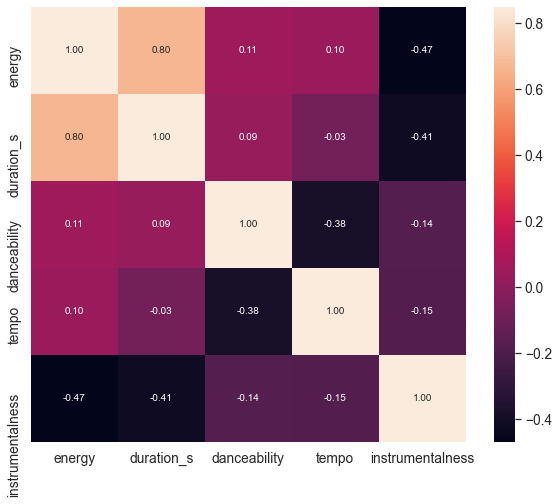

In [51]:
# Aquello que tienen una variación pequeña
acotados = ["danceability", "duration_s","energy","instrumentalness","tempo"]
heatmap(semanal, vars = acotados, nombre = "giguras/mapas calor/heatmap acotado")